In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("craigslistVehicles.csv")

In [117]:
df.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,...,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-20...,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,...,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU...,2002 GMC Sierra Extended Cab Truck For Sale! R...,32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenri...,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,...,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCG...,"2012 Chevrolet 3500 178k miles, runs and drive...",32.781689,-98.942248


In [8]:
df.drop(columns=['url','city_url','desc','image_url','VIN'],axis=1,inplace=True)

In [9]:
categorical=[]
numerical=[]
for i in df.columns:
#     print(i,df[i].unique(),len(df[i].unique()))
#     print("\n")
    if len(df[i].unique())<50:
        categorical.append(i)
    else:
        numerical.append(i)

In [10]:
categorical

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [12]:
numerical.pop(0)


'city'

In [13]:
numerical

['price', 'year', 'make', 'odometer', 'lat', 'long']

In [14]:
df.drop(columns=['make'],axis=1,inplace=True)

In [15]:
import statistics as st

In [16]:
st.mode(df['manufacturer'])

'ford'

In [17]:
df=df.iloc[1:5001]

In [19]:
df.isnull().sum()

city               0
price              0
year               4
manufacturer     240
condition       2152
cylinders       2165
fuel              29
odometer        1014
title_status      47
transmission      19
drive           1690
size            3463
type            1564
paint_color     1617
lat               88
long              88
dtype: int64

In [20]:
for i in df.columns:
    if i in categorical:
        df[i].fillna(df[i].mode(),inplace=True)
    elif i in numerical:
        df[i] = df[i].fillna(np.mean(df[i]))

In [21]:
df.isnull().sum()

city               0
price              0
year               0
manufacturer     240
condition       2152
cylinders       2165
fuel              29
odometer           0
title_status      47
transmission      19
drive           1690
size            3463
type            1564
paint_color     1617
lat                0
long               0
dtype: int64

In [128]:
df['cylinders'].mode()

0    6 cylinders
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 16 columns):
city            5000 non-null object
price           5000 non-null int64
year            4996 non-null float64
manufacturer    4760 non-null object
condition       2848 non-null object
cylinders       2835 non-null object
fuel            4971 non-null object
odometer        3986 non-null float64
title_status    4953 non-null object
transmission    4981 non-null object
drive           3310 non-null object
size            1537 non-null object
type            3436 non-null object
paint_color     3383 non-null object
lat             4912 non-null float64
long            4912 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 625.1+ KB


In [130]:
from sklearn.impute import SimpleImputer

In [131]:
Imputer = SimpleImputer(missing_values='NaN', strategy='most_frequent')


In [22]:
for i in categorical:
    df[i] = df[i].fillna(method='bfill')

In [23]:
df.isnull().sum()

city            0
price           0
year            0
manufacturer    0
condition       7
cylinders       7
fuel            0
odometer        0
title_status    0
transmission    0
drive           7
size            7
type            0
paint_color     0
lat             0
long            0
dtype: int64

In [24]:
for i in categorical:
    df[i] = df[i].fillna(method='ffill')

In [26]:
df.to_csv('cleanedCraigsList.csv')

In [25]:
df.isnull().sum()

city            0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
dtype: int64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cleanedCraigsList.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

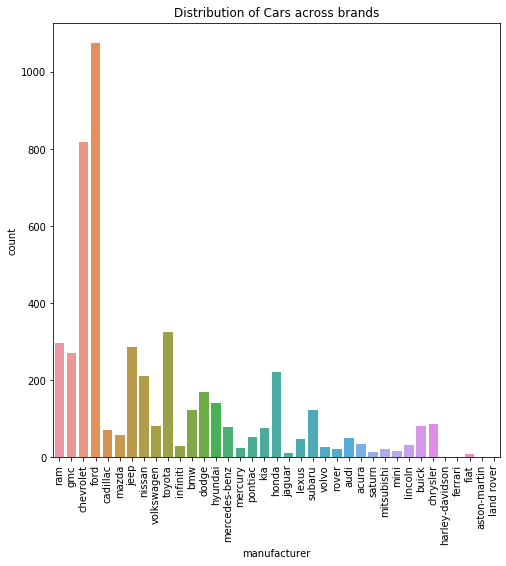

In [4]:

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.countplot(x='manufacturer',data=df)
plt.title("Distribution of Cars across brands")
# fig.set_size_inches(20,10)
# fig1.set_size_inches(20,20)
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

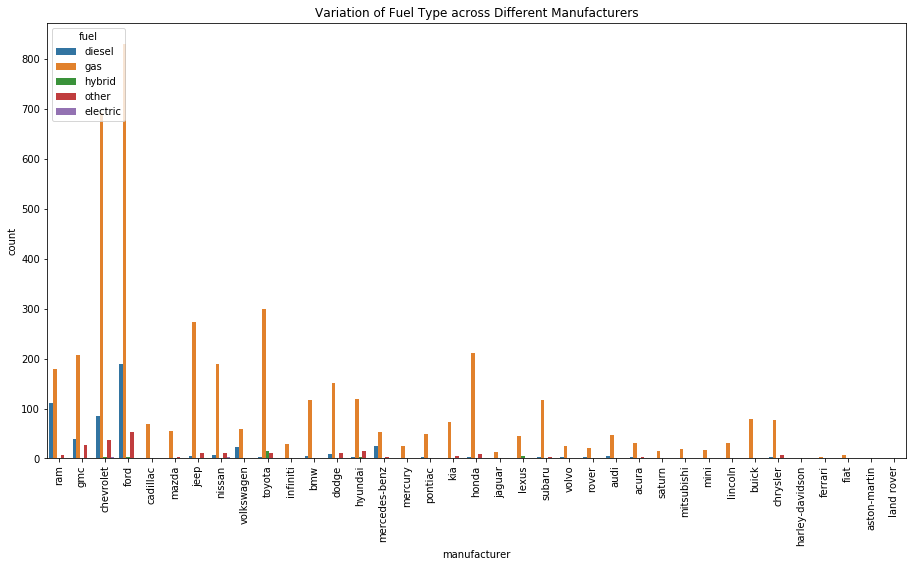

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(13,7)
sns.countplot(x='manufacturer',hue="fuel",data=df)
plt.title("Variation of Fuel Type across Different Manufacturers")
fig.tight_layout()
plt.xticks(rotation = 90)
# fig.set_size_inches(20,10)
# fig1.set_size_inches(20,20)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

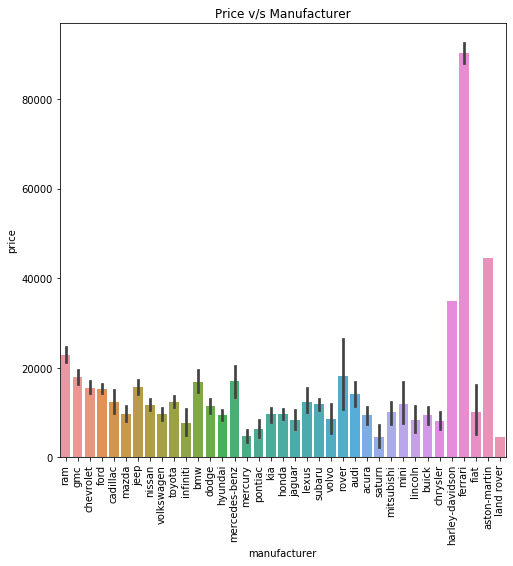

In [136]:
ax, fig = plt.subplots()
sns.barplot(x='manufacturer',y='price',data = df)
plt.title("Price v/s Manufacturer")
ax.set_size_inches(8,8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

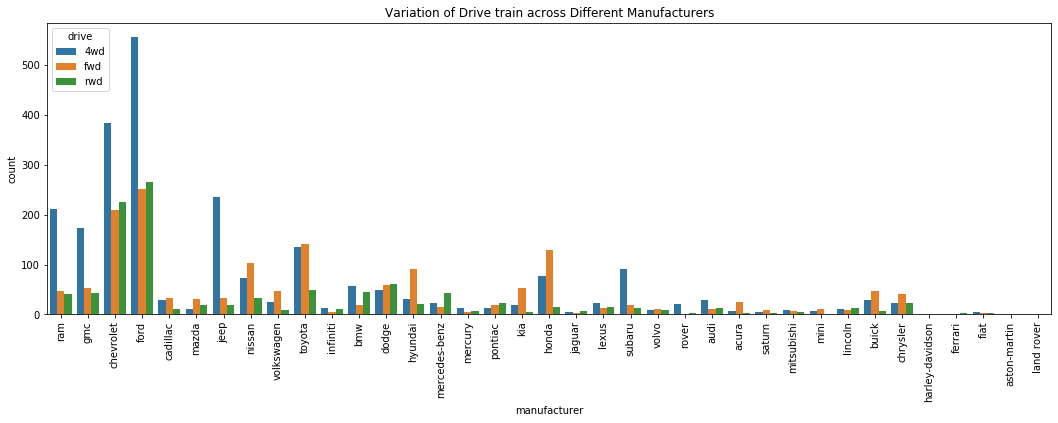

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x='manufacturer',hue="drive",data=df)
plt.title("Variation of Drive train across Different Manufacturers")
fig.tight_layout()
plt.xticks(rotation= 90)
# fig.set_size_inches(20,10)
# fig1.set_size_inches(20,20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

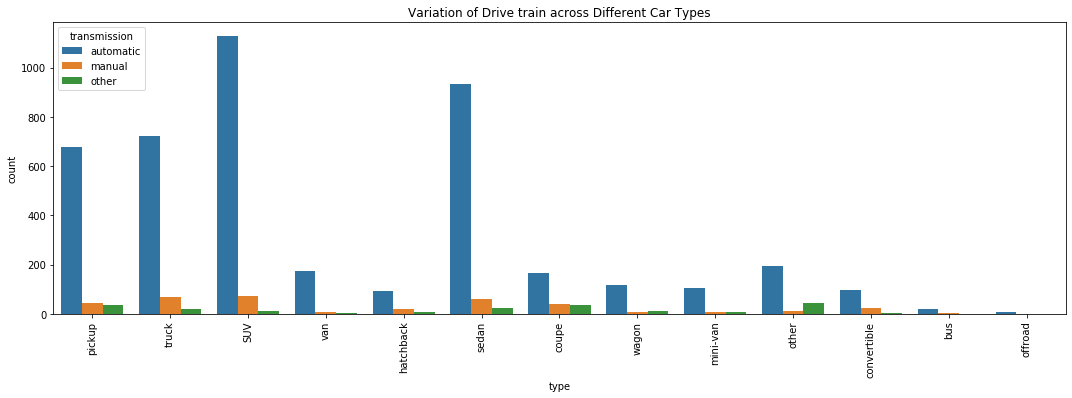

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x='type',hue="transmission",data=df)
plt.title("Variation of Drive train across Different Car Types")
fig.tight_layout()
plt.xticks(rotation= 90)

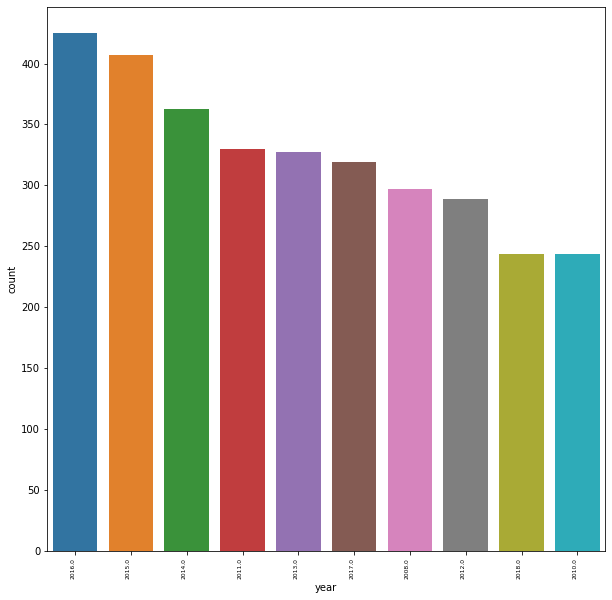

In [8]:
years_top10 = df['year'].value_counts().iloc[:10]
years = pd.DataFrame({'year': years_top10.index, 'count': years_top10.values})
plt.figure(figsize=(10,10))
ax = sns.barplot(x='year',y='count',data=years, order=years['year']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);


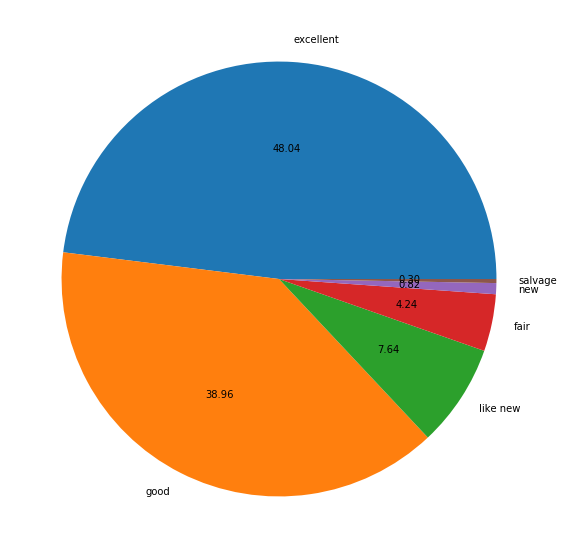

In [9]:
plt.figure(figsize=(10,10))
labels = pd.DataFrame(df["condition"].value_counts())
plt.pie(df["condition"].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()




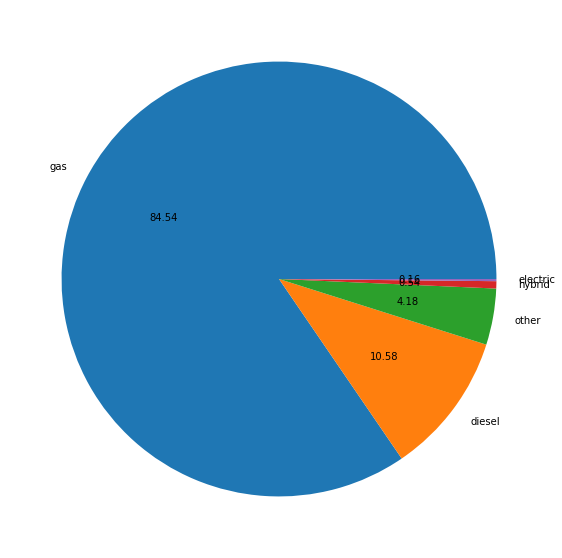

In [10]:
plt.figure(figsize=(10,10))
labels = pd.DataFrame(df["fuel"].value_counts())
plt.pie(df["fuel"].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()

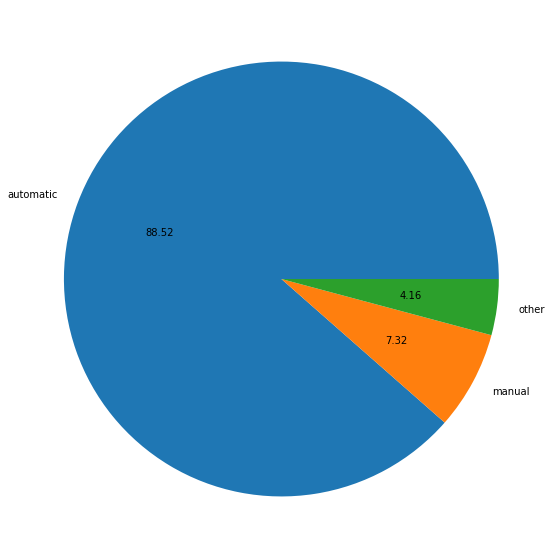

In [11]:
plt.figure(figsize=(10,10))
labels = pd.DataFrame(df["transmission"].value_counts())
plt.pie(df["transmission"].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
categorical=[]
numerical=[]
for i in df.columns:
#     print(i,df[i].unique(),len(df[i].unique()))
#     print("\n")
    if len(df[i].unique())<50:
        categorical.append(i)
    else:
        numerical.append(i)

In [150]:
df.dtypes

city             object
price           float64
year            float64
manufacturer      int64
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
dtype: object

In [16]:
categorical.pop(0)

'city'

In [17]:
categorical

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [18]:
df.dtypes

Unnamed: 0        int64
city             object
price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
dtype: object

In [19]:
df['condition']

0            good
1            good
2            good
3       excellent
4            fair
          ...    
4995    excellent
4996    excellent
4997    excellent
4998    excellent
4999    excellent
Name: condition, Length: 5000, dtype: object

In [20]:
df.isnull().sum()

Unnamed: 0      0
city            0
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
dtype: int64

In [21]:
for i in categorical:
    print(i+'\n')
    labelencoder_X = LabelEncoder()
    df[i] = labelencoder_X.fit_transform(df[i])

    # Encoding the Dependent Variable
#     labelencoder_y = LabelEncoder()
#     y = labelencoder_y.fit_transform(y)

manufacturer

condition

cylinders

fuel

title_status

transmission

drive

size

type

paint_color



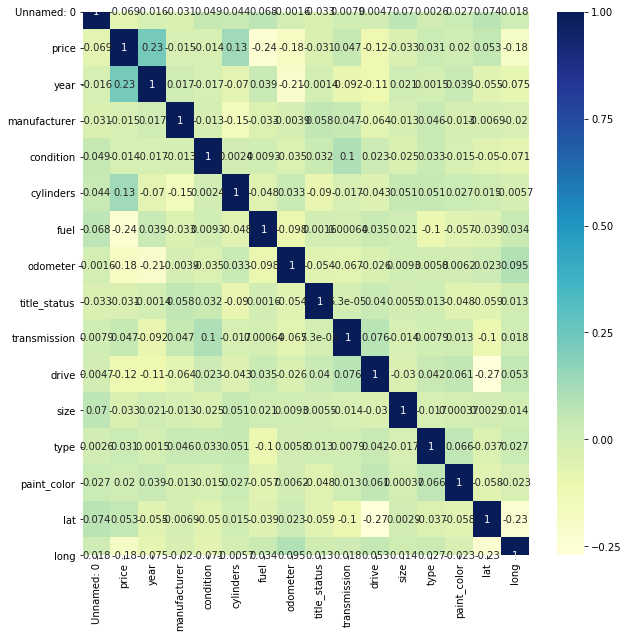

In [22]:
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,cmap="YlGnBu",annot=True)

In [23]:
from sklearn import preprocessing

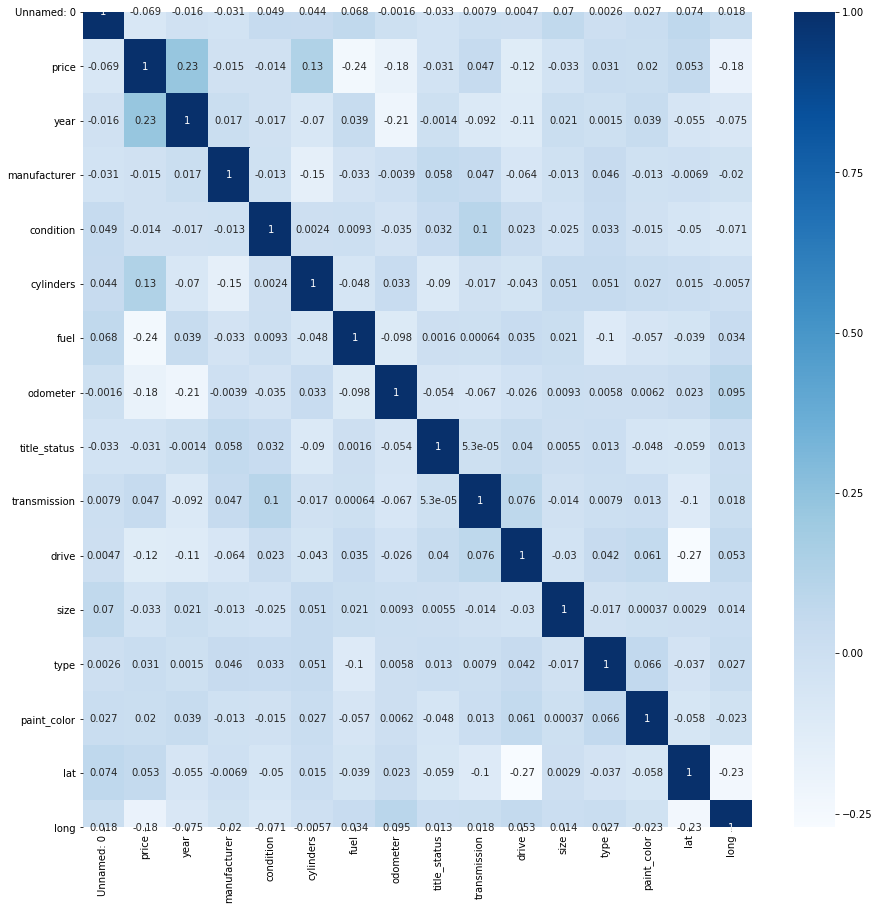

In [24]:
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr,cmap="Blues",annot=True)

In [25]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
UB = Q3+1.5*IQR
LB = Q1-1.5*IQR
df["price"] = np.where(df["price"] >UB, np.median(df['price']),df['price'])
df["price"] = np.where(df["price"] <LB, np.median(df['price']),df['price'])

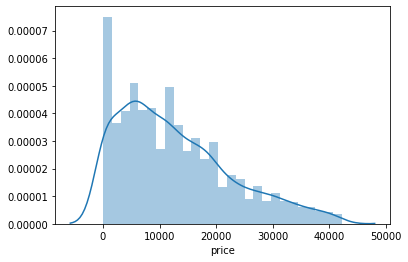

In [26]:
sns.distplot(df['price'])

H0: Average price of the car greater than 16,000.

H1: Average price of the car is less than 16,000

Now, we shall test the null hypothesis using the z-score test

In [27]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(df['price'], x2=None, value=16000)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

5.770992479603552e-119
reject null hypothesis
